<a href="https://colab.research.google.com/github/ashishdhodria/Data-Structure-and-Algorithms/blob/master/KerasCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [89]:
X_train.shape

(50000, 32, 32, 3)

In [90]:
X_train[0].shape

(32, 32, 3)

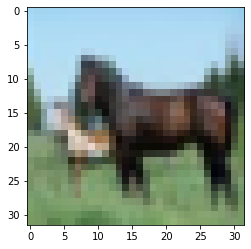

In [91]:
plt.imshow(X_train[12])

In [92]:
y_train.shape

(50000, 1)

In [93]:
X_train[0].max()

255

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test) 

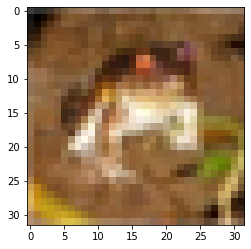

In [97]:
plt.imshow(X_train[0])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dense, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [103]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=[X_test, y_cat_test], callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 6s 126us/sample - loss: 1.6234 - acc: 0.4011 - val_loss: 1.3510 - val_acc: 0.5067
Epoch 2/15
50000/50000 [==============================] - 6s 121us/sample - loss: 1.2976 - acc: 0.5316 - val_loss: 1.2411 - val_acc: 0.5548
Epoch 3/15
50000/50000 [==============================] - 6s 122us/sample - loss: 1.1822 - acc: 0.5786 - val_loss: 1.2402 - val_acc: 0.5602
Epoch 4/15
50000/50000 [==============================] - 6s 120us/sample - loss: 1.1048 - acc: 0.6101 - val_loss: 1.1417 - val_acc: 0.5966
Epoch 5/15
50000/50000 [==============================] - 6s 121us/sample - loss: 1.0478 - acc: 0.6316 - val_loss: 1.1288 - val_acc: 0.5975
Epoch 6/15
50000/50000 [==============================] - 6s 127us/sample - loss: 1.0003 - acc: 0.6482 - val_loss: 1.0820 - val_acc: 0.6221
Epoch 7/15
50000/50000 [==============================] - 6s 125us/sample - loss: 0.9604 - acc: 0.6625 - val_l

In [0]:
loss_metric = pd.DataFrame(model.history.history)

In [105]:
loss_metric.head()

,loss,acc,val_loss,val_acc
0,1.623391,0.40114,1.351023,0.5067
1,1.297561,0.53162,1.241090,0.5548
2,1.182186,0.57862,1.240195,0.5602
3,1.104796,0.61010,1.141713,0.5966
4,1.047848,0.63158,1.128804,0.5975


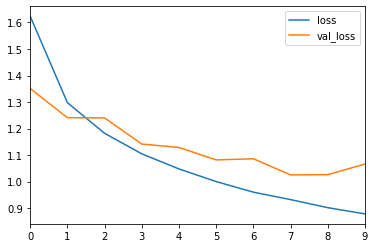

In [106]:
loss_metric[['loss', 'val_loss']].plot()

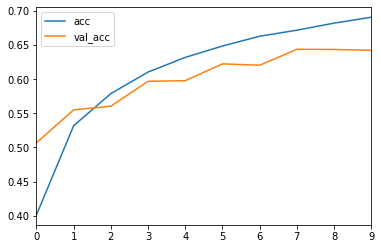

In [107]:
loss_metric[['acc', 'val_acc']].plot()

In [108]:
model.evaluate(X_test, y_cat_test, verbose=0)

[1.0662322107315063, 0.6419]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [111]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.70      0.72      0.71      1000\n           1       0.73      0.84      0.78      1000\n           2       0.81      0.29      0.43      1000\n           3       0.48      0.40      0.43      1000\n           4       0.52      0.62      0.57      1000\n           5       0.52      0.61      0.56      1000\n           6       0.75      0.72      0.73      1000\n           7       0.54      0.80      0.64      1000\n           8       0.79      0.68      0.73      1000\n           9       0.77      0.74      0.75      1000\n\n    accuracy                           0.64     10000\n   macro avg       0.66      0.64      0.63     10000\nweighted avg       0.66      0.64      0.63     10000\n'

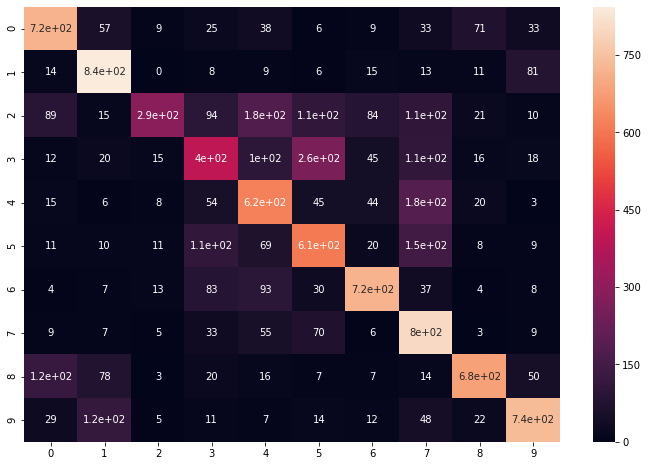

In [113]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [0]:
image = X_test[12]

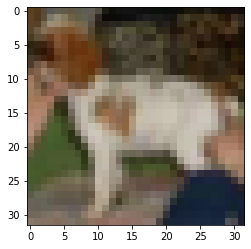

In [121]:
plt.imshow(image)

In [123]:
y_test[12]

array([5], dtype=uint8)

In [124]:
model.predict_classes(image.reshape(1, 32, 32, 3))

array([5])